<a href="https://colab.research.google.com/github/atharvaombase/DSBDA/blob/main/Data_visualization_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
df=pd.read_csv('/content/sample_data/Titanic-Dataset.csv')

In [43]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [44]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [45]:
df['Age'].fillna(df['Age'].median(), inplace=True)

<ipython-input-45-63d4fb902a4f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [46]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

<ipython-input-46-808ebb813aa0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [47]:
df.drop('Cabin',axis=1,inplace=True)

In [48]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [49]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_clean = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data_clean

In [50]:
df=remove_outliers_iqr(df,'Age')
df=remove_outliers_iqr(df,'Fare')

In [51]:
df.shape
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000
mean,447.883008,0.334262,2.512535,28.079387,0.413649,0.317549,17.193204
std,259.549777,0.472061,0.715818,10.012369,0.855001,0.784792,13.244507
min,1.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000
25%,220.250000,0.000000,2.000000,22.000000,0.000000,0.000000,7.889575
50%,447.500000,0.000000,3.000000,28.000000,0.000000,0.000000,11.750000
75%,673.500000,1.000000,3.000000,32.875000,1.000000,0.000000,25.928150
max,891.000000,1.000000,3.000000,54.000000,5.000000,6.000000,61.379200


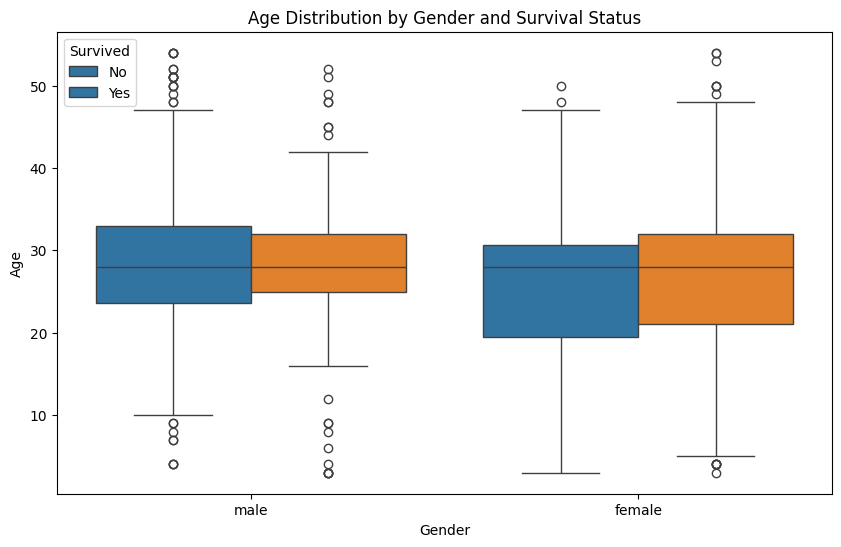

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sex', y='Age', hue='Survived', data=df)

plt.title('Age Distribution by Gender and Survival Status')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()